In [22]:
import pandas as pd

In [23]:
df_url = "https://raw.githubusercontent.com/EZags/Milliman-Project-2025/main/merged_df1.csv"
df = pd.read_csv(df_url)
#Drop non-numeric columns
df

,county_state,fips,population,dep_prevalence,Households Total,Households Mean income (dollars),Households Median income (dollars),Premature Death Deaths,Premature Death Years of Potential Life Lost Rate,Poor Physical Health Days Average Number of Physically Unhealthy Days,...,Unemployment % Unemployed,Income Inequality 80th Percentile Income,Income Inequality 20th Percentile Income,Income Inequality Income Ratio,Children in Poverty % Children in Poverty,Injury Deaths # Injury Deaths,Injury Deaths Injury Death Rate,Social Associations # Associations,Social Associations Social Association Rate,Child Care Cost Burden % Household Income Required for Child Care Expenses
0,"AUTAUGA COUNTY, ALABAMA",1001,60436,18,NaN,NaN,NaN,1008.0,9938.263382,4.300364,...,2.188889,132562.0,31018.0,4.273712,17.0,189.0,65.975725,67.0,11.211700,21.835108
1,"BALDWIN COUNTY, ALABAMA",1003,254107,18,105698.0,98279.0,72915.0,3944.0,8957.112686,3.876436,...,2.279497,141920.0,32554.0,4.359526,14.1,953.0,82.420053,239.0,9.698298,19.354057
2,"BARBOUR COUNTY, ALABAMA",1005,24644,19,NaN,NaN,NaN,587.0,12738.656137,5.431030,...,4.431017,99138.0,17658.0,5.614339,34.8,106.0,85.603993,22.0,8.904720,28.579628
3,"BIBB COUNTY, ALABAMA",1007,21890,24,NaN,NaN,NaN,509.0,11708.948038,5.055619,...,2.462380,102593.0,19188.0,5.346727,21.4,111.0,99.630201,19.0,8.634401,26.582776
4,"BLOUNT COUNTY, ALABAMA",1009,59777,22,NaN,NaN,NaN,1273.0,11898.088409,4.802400,...,2.144295,117729.0,25484.0,4.619722,16.6,287.0,98.254695,44.0,7.393467,25.313260
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3236,"VEGA BAJA MUNICIPIO, PUERTO RICO",72145,0,18,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3237,"VIEQUES MUNICIPIO, PUERTO RICO",72147,0,10,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3238,"VILLALBA MUNICIPIO, PUERTO RICO",72149,0,11,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3239,"YABUCOA MUNICIPIO, PUERTO RICO",72151,0,14,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Load data (assuming it's already loaded as df)
# df = pd.read_csv('your_data.csv')

# Data Cleaning
# Remove rows with missing target variable
df = df.dropna(subset=['dep_prevalence'])

# Remove columns with too many missing values (>50%)
threshold = len(df) * 0.5
df = df.dropna(thresh=threshold, axis=1)

# Remove non-numeric columns that won't be used as features
df = df.drop(['county_state', 'fips'], axis=1)

# Remove rows where population is 0 (like Puerto Rico municipalities)
df = df[df['population'] > 0]

# Define features and target
X = df.drop('dep_prevalence', axis=1)
y = df['dep_prevalence']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing pipeline
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features)])

In [25]:
# Create pipeline with preprocessing and model
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                          ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))])

# Train model
pipeline.fit(X_train, y_train)

# Predictions
y_pred = pipeline.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Model Performance:")
print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

Model Performance:
Mean Squared Error: 7.40
R-squared: 0.42


In [26]:
# Get feature importances
rf = pipeline.named_steps['regressor']
feature_names = numeric_features
importances = rf.feature_importances_

# Create DataFrame of feature importances
feature_importances = pd.DataFrame({'feature': feature_names, 'importance': importances})
feature_importances = feature_importances.sort_values('importance', ascending=False)

print("\nTop 10 Important Features:")
print(feature_importances.head(10))


Top 10 Important Features:
                                              feature  importance
16  Preventable Hospital Stays Preventable Hospita...    0.069525
34     High School Completion # Completed High School    0.060995
27  Air Pollution: Particulate Matter Average Dail...    0.052953
7                       Flu Vaccinations % Vaccinated    0.044850
0                                          population    0.039469
24        Driving Alone to Work % Drive Alone to Work    0.035617
32                            Some College Population    0.034453
17      Mammography Screening % with Annual Mammogram    0.033086
1                              Premature Death Deaths    0.031307
22               Severe Housing Problems Overcrowding    0.029158


In [27]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Assuming df is your DataFrame
# Drop rows where target is missing
df = df.dropna(subset=['dep_prevalence'])

# Separate features and target
X = df.drop(columns=['county_state', 'fips', 'dep_prevalence'])
y = df['dep_prevalence']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features)])

# Function to evaluate models
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    
    print(f"R² Score: {r2:.4f}")
    print(f"Mean Squared Error: {mse:.4f}")
    print(f"Root Mean Squared Error: {rmse:.4f}")
    print(f"Mean Absolute Error: {mae:.4f}")
    
    return {'R2': r2, 'MSE': mse, 'RMSE': rmse, 'MAE': mae}

KeyError: "['county_state', 'fips'] not found in axis"

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

rf_pipeline.fit(X_train, y_train)
print("Random Forest Regressor Performance:")
rf_metrics = evaluate_model(rf_pipeline, X_test, y_test)

Random Forest Regressor Performance:
R² Score: 0.3954
Mean Squared Error: 8.8597
Root Mean Squared Error: 2.9765
Mean Absolute Error: 2.1930


In [ ]:
from xgboost import XGBRegressor

xgb_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', XGBRegressor(n_estimators=100, random_state=42))
])

xgb_pipeline.fit(X_train, y_train)
print("\nXGBoost Regressor Performance:")
xgb_metrics = evaluate_model(xgb_pipeline, X_test, y_test)


XGBoost Regressor Performance:
R² Score: 0.3719
Mean Squared Error: 9.2036
Root Mean Squared Error: 3.0337
Mean Absolute Error: 2.2358


In [ ]:
from sklearn.svm import SVR

svr_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', SVR(kernel='rbf', C=1.0, epsilon=0.1))
])

svr_pipeline.fit(X_train, y_train)
print("\nSupport Vector Regressor Performance:")
svr_metrics = evaluate_model(svr_pipeline, X_test, y_test)


Support Vector Regressor Performance:
R² Score: 0.3535
Mean Squared Error: 9.4727
Root Mean Squared Error: 3.0778
Mean Absolute Error: 2.2439


In [ ]:
from sklearn.neural_network import MLPRegressor

nn_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', MLPRegressor(hidden_layer_sizes=(100,50),
                              activation='relu',
                              solver='adam',
                              max_iter=500,
                              random_state=42))
])

nn_pipeline.fit(X_train, y_train)
print("\nNeural Network Regressor Performance:")
nn_metrics = evaluate_model(nn_pipeline, X_test, y_test)


Neural Network Regressor Performance:
R² Score: 0.1101
Mean Squared Error: 13.0400
Root Mean Squared Error: 3.6111
Mean Absolute Error: 2.7004


In [ ]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import RidgeCV

# Define base estimators
estimators = [
    ('rf', RandomForestRegressor(n_estimators=100, random_state=42)),
    ('xgb', XGBRegressor(n_estimators=100, random_state=42))
]

stacked_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', StackingRegressor(
        estimators=estimators,
        final_estimator=RidgeCV(),
        cv=5))
])

stacked_pipeline.fit(X_train, y_train)
print("\nStacked Ensemble Regressor Performance:")
stacked_metrics = evaluate_model(stacked_pipeline, X_test, y_test)


Stacked Ensemble Regressor Performance:
R² Score: 0.4139
Mean Squared Error: 8.5881
Root Mean Squared Error: 2.9305
Mean Absolute Error: 2.1387


In [ ]:
metrics_df = pd.DataFrame({
    'Random Forest': rf_metrics,
    'XGBoost': xgb_metrics,
    'SVR': svr_metrics,
    'Neural Network': nn_metrics,
    'Stacked Ensemble': stacked_metrics
}).T

print("\nModel Comparison:")
print(metrics_df.sort_values(by='R2', ascending=False))


Model Comparison:
                        R2        MSE      RMSE       MAE
Stacked Ensemble  0.413911   8.588105  2.930547  2.138743
Random Forest     0.395375   8.859726  2.976529  2.192972
XGBoost           0.371910   9.203562  3.033737  2.235769
SVR               0.353544   9.472677  3.077772  2.243902
Neural Network    0.110094  13.040010  3.611095  2.700385


C:\Users\atokr\AppData\Local\Temp\ipykernel_6896\4098462582.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=metrics_df.index, y=metrics_df['R2'], palette='viridis')
C:\Users\atokr\AppData\Local\Temp\ipykernel_6896\4098462582.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=metrics_df.index, y=metrics_df['MSE'], palette='rocket_r')
C:\Users\atokr\AppData\Local\Temp\ipykernel_6896\4098462582.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=metrics_df.index, y=metrics_df['RMSE'], palette='mako_r')
C:\Users\atok

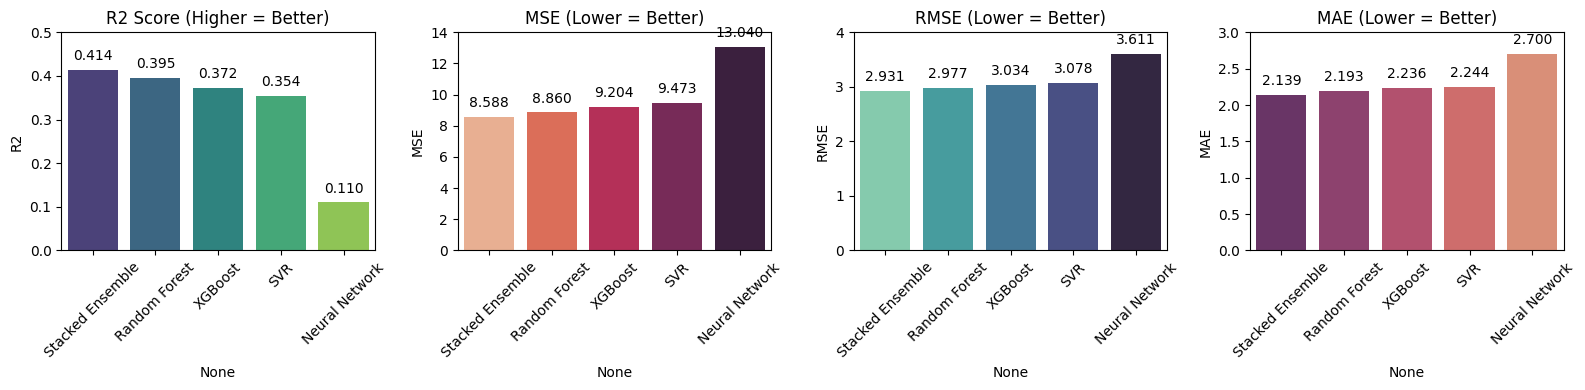


Model Performance Comparison:
                        R2        MSE      RMSE       MAE
Stacked Ensemble  0.413911   8.588105  2.930547  2.138743
Random Forest     0.395375   8.859726  2.976529  2.192972
XGBoost           0.371910   9.203562  3.033737  2.235769
SVR               0.353544   9.472677  3.077772  2.243902
Neural Network    0.110094  13.040010  3.611095  2.700385


In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Your provided metrics
metrics_df = pd.DataFrame({
    'Stacked Ensemble': {'R2': 0.413911, 'MSE': 8.588105, 'RMSE': 2.930547, 'MAE': 2.138743},
    'Random Forest': {'R2': 0.395375, 'MSE': 8.859726, 'RMSE': 2.976529, 'MAE': 2.192972},
    'XGBoost': {'R2': 0.371910, 'MSE': 9.203562, 'RMSE': 3.033737, 'MAE': 2.235769},
    'SVR': {'R2': 0.353544, 'MSE': 9.472677, 'RMSE': 3.077772, 'MAE': 2.243902},
    'Neural Network': {'R2': 0.110094, 'MSE': 13.040010, 'RMSE': 3.611095, 'MAE': 2.700385}
}).T

# Create figure with 4 metrics
plt.figure(figsize=(16, 4))

# R2 Score
plt.subplot(1, 4, 1)
ax = sns.barplot(x=metrics_df.index, y=metrics_df['R2'], palette='viridis')
plt.title('R2 Score (Higher = Better)')
plt.ylim(0, 0.5)
plt.xticks(rotation=45)
for p in ax.patches:
    ax.annotate(f"{p.get_height():.3f}", 
               (p.get_x() + p.get_width() / 2., p.get_height()),
               ha='center', va='center', xytext=(0, 10), 
               textcoords='offset points')

# MSE
plt.subplot(1, 4, 2)
ax = sns.barplot(x=metrics_df.index, y=metrics_df['MSE'], palette='rocket_r')
plt.title('MSE (Lower = Better)')
plt.ylim(0, 14)
plt.xticks(rotation=45)
for p in ax.patches:
    ax.annotate(f"{p.get_height():.3f}", 
               (p.get_x() + p.get_width() / 2., p.get_height()),
               ha='center', va='center', xytext=(0, 10), 
               textcoords='offset points')

# RMSE
plt.subplot(1, 4, 3)
ax = sns.barplot(x=metrics_df.index, y=metrics_df['RMSE'], palette='mako_r')
plt.title('RMSE (Lower = Better)')
plt.ylim(0, 4)
plt.xticks(rotation=45)
for p in ax.patches:
    ax.annotate(f"{p.get_height():.3f}", 
               (p.get_x() + p.get_width() / 2., p.get_height()),
               ha='center', va='center', xytext=(0, 10), 
               textcoords='offset points')

# MAE
plt.subplot(1, 4, 4)
ax = sns.barplot(x=metrics_df.index, y=metrics_df['MAE'], palette='flare_r')
plt.title('MAE (Lower = Better)')
plt.ylim(0, 3)
plt.xticks(rotation=45)
for p in ax.patches:
    ax.annotate(f"{p.get_height():.3f}", 
               (p.get_x() + p.get_width() / 2., p.get_height()),
               ha='center', va='center', xytext=(0, 10), 
               textcoords='offset points')

plt.tight_layout()
plt.show()

# Print performance table
print("\nModel Performance Comparison:")
print(metrics_df.sort_values(by='R2', ascending=False))